https://coding-bootcamps.notion.site/Holiday-Mood-Tracker-2c46ed1efc938057be5fc3181d44f7f2

https://www.figma.com/slides/w0R7s3AnDZCqXqOWCfRh5Z/Untitled?node-id=1-1313&t=GysCspp4o5eRdJp1-1

In [480]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [481]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import shuffle

from sklearn.metrics import silhouette_score, roc_auc_score, roc_curve

In [482]:
try:
    df = pd.read_csv('/content/drive/MyDrive/December Code Jam/Daylio_Abid.csv')
except:
    df = pd.read_csv('dataset.csv')

In [483]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


### Data Cleaning/ Preprocessing

In [484]:
#df['full_date'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

/tmp/ipython-input-2562534138.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


In [485]:
df.set_index('datetime', inplace=True)

df = df.sort_index(ascending=False)

In [486]:
print(df.index.is_monotonic_decreasing)

True


In [487]:
print(df.index.is_monotonic_increasing)

False


In [488]:
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,47
mood,0


In [489]:
df.shape

(940, 4)

In [490]:
df.dropna(inplace=True)

df.isna().sum()

,0
weekday,0
sub_mood,0
activities,0
mood,0


In [491]:
df.duplicated().sum()

np.int64(1)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 893 entries, 2021-12-04 21:52:00 to 2018-01-03 12:20:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     893 non-null    object
 1   sub_mood    893 non-null    object
 2   activities  893 non-null    object
 3   mood        893 non-null    object
dtypes: object(4)
memory usage: 34.9+ KB


In [493]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,reading | learning | fasting | walk | medita...,Awful
2021-12-03 21:01:00,Friday,focused,reading | learning | prayer | fasting | walk...,Good
2021-12-02 21:10:00,Friday,worried,reading | learning | prayer | fasting | walk...,Bad
2021-12-01 21:46:00,Tuesday,Cool,learning | walk | streaming | youtube | cook...,Amazing
2021-11-04 00:21:00,Sunday,wondering,reading | learning | prayer | fasting | walk...,Normal


In [494]:
df['activities'] = df['activities'].str.split('|')

In [495]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [497]:
### Core Goals

In [498]:
mood_counts = df['mood'].value_counts().reset_index()

mood_counts.columns = ['mood', 'count']

In [499]:
mood_counts

,mood,count
0,Good,470
1,Normal,166
2,Amazing,163
3,Awful,49
4,Bad,45


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

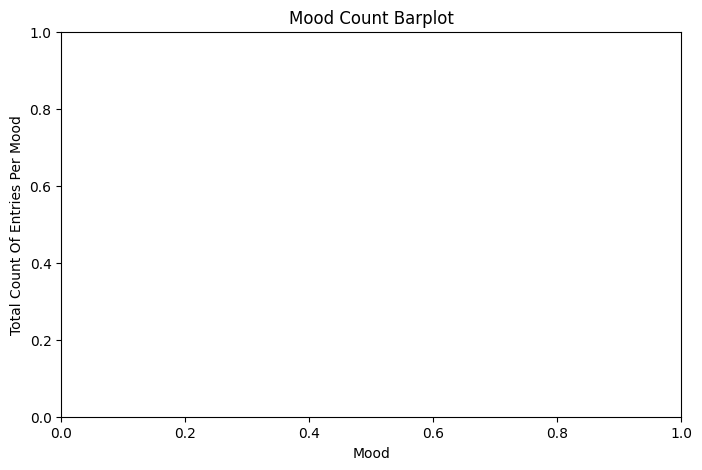

In [623]:
#(Core Goal: A bar chart showing the frequency of each mood category.)
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts, x='mood', y='count', color='darkred')
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [624]:
df_copy = df.copy()
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()

bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]
bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

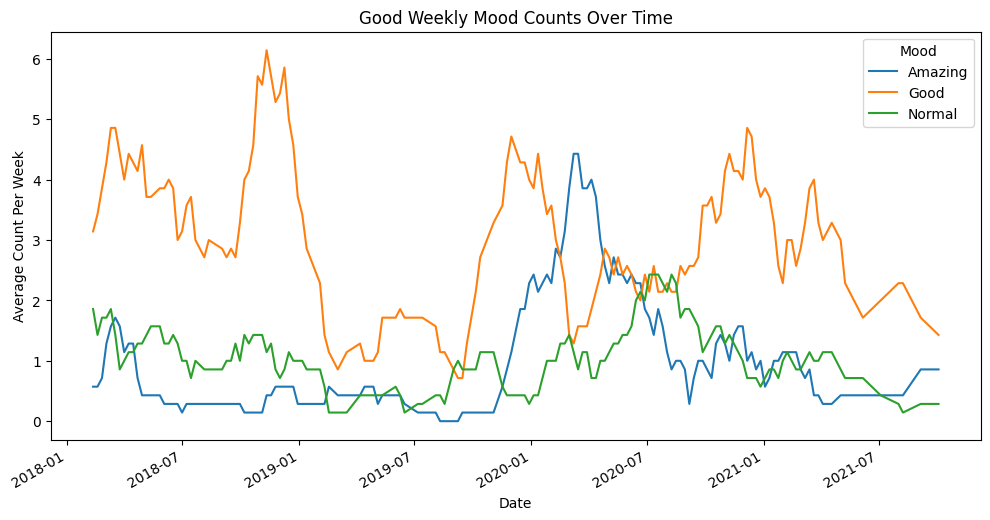

In [503]:
#(Core Goal: A line chart showing a numeric mood score or mood category over time.)
good_smoothed.plot(figsize=(12,6))
plt.title("Good Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()


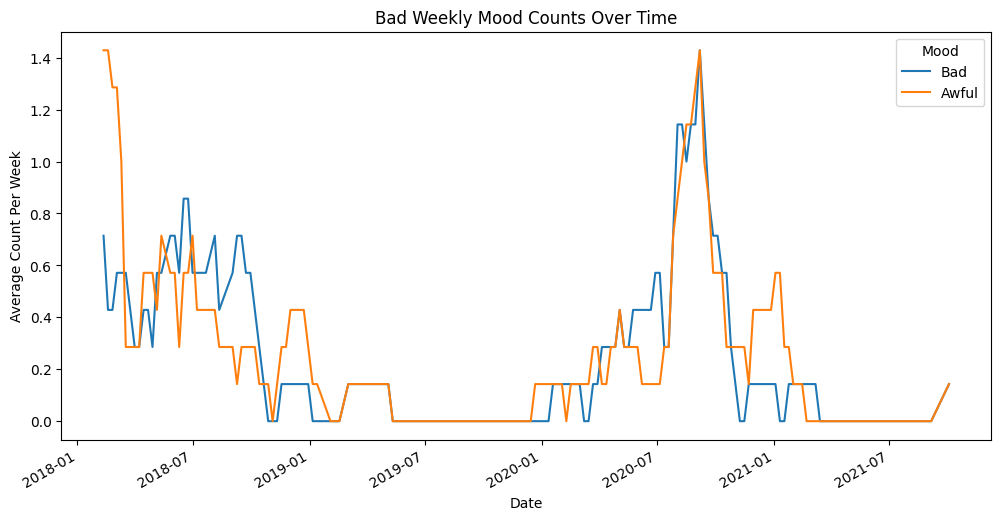

In [504]:
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()


In [506]:
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

df['mood_encoded'] = df['mood'].map(mood_map)

In [507]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
mean_mood_score = df['mood_encoded'].mean()

print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


In [508]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
most_common_mood = df['mood'].mode()

print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


In [509]:
activities_explode_df = df.explode('activities')

activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()

activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [511]:
activities_sorted = activities_explode_df['activities'].value_counts().reset_index()
activities_sorted.columns = ['activities', 'count']
activities_sorted = activities_sorted.sort_values(by='count', ascending=False)
top_10_activities = activities_sorted.head(10)

In [512]:
top_10_activities

,activities,count
0,youtube,770
1,streaming,710
2,good meal,586
3,audio books,553
4,reddit,542
5,meditation,541
6,watching series,539
7,walk,521
8,news update,520
9,fasting,485


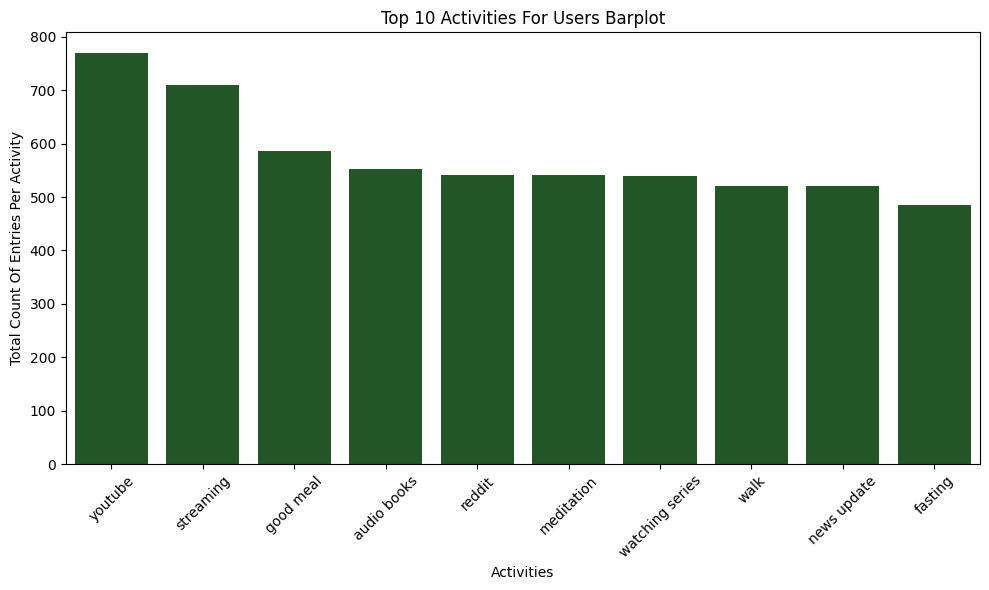

In [513]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities, x='activities', y='count', color='#1B5E20')
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Top 10 Activities Slide Text:

* The top 10 most popular activities for users mainly consists of: media based activities (such as YouTube, streaming, and audiobooks) and self care based activities (such as eating a good meal, meditation, and fasting).

* Media based activities appear to be more popular among users than self care based activities, with YouTube having a total count of 770 user entries and Streaming having a total count of 710 user entries.

In [514]:
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [515]:
medium_freq_activities = activities_sorted[(activities_sorted['count'] >= 365) & (activities_sorted['count'] <= 405)]

medium_freq_activities.head(3)

,activities,count
11,power nap,400
12,prayer,398
13,penpal,388


In [516]:
activities_ascending_sorted = activities_sorted.sort_values(by='count', ascending=True)
bottom_5_activities = activities_ascending_sorted.head(5)
bottom_5_activities

,activities,count
55,video editing,3
56,hiking,3
54,hospital,4
53,party,6
52,phd,7


### Stretch Goals

In [517]:
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal'
    ]

activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)

activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [518]:
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

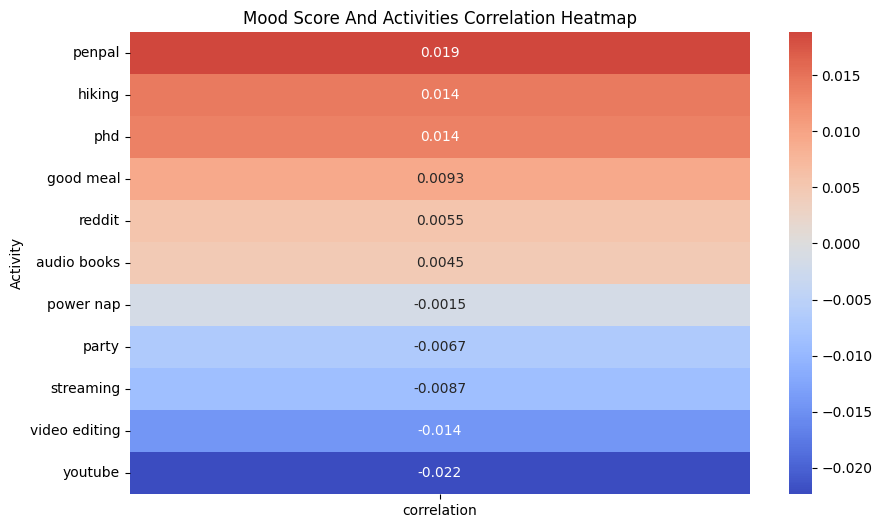

In [519]:
#Stretch Goals: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('mood_activites_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Correlation Heatmap Slide Text:

* This heatmap displays the correlation between various user activities and mood score.  

* From the activities, it appears that self care/ self improvement activities such as: penpal, hiking, and phd study had the most positive correlations with mood score.

* Although popular among users, media based activities such as YouTube and streaming had the most negative correlation with mood score.

### Creating User ID for EDA chart

In [520]:

user_df = activities_explode_df.sort_index().copy()

n_users = 30

user_df['user_id'] = (
    np.repeat(
        np.arange(1, n_users + 1),
        np.ceil(len(user_df) / n_users)
    )[:len(user_df)]
)

user_df['user_id'].value_counts().sort_index()

user_7 = user_df[user_df['user_id'] == 7]

activities_sorted = activities_explode_df['activities'].value_counts().reset_index()
activities_sorted.columns = ['activities', 'count']
activities_sorted = activities_sorted.sort_values(by='count', ascending=False)
top_10_activities = activities_sorted.head(10)

Name = "Carol Romas"

In [521]:
user_7_activities = user_7[['activities']]

In [522]:
user_7_sorted = user_7_activities.value_counts().reset_index()
user_7_sorted.columns = ['activities', 'count']
user_7_sorted = user_7_sorted.sort_values(by='count', ascending=False)

user_7_top_5_activities = user_7_sorted.head()

user_7_top_5_activities

,activities,count
0,streaming,30
1,reddit,30
2,youtube,30
3,walk,30
4,meditation,30


In [523]:
user_7_activities = [
    'youtube',
    'walk',
    'meditation',
    'streaming',
    'shower',
    'new things',
    'love',
    'family',
    'email',
    'art'
]

user_7_corr_df = user_7[user_7['activities'].isin(user_7_activities)]
user_7_activities_encoded = pd.get_dummies(user_7_corr_df['activities'], dtype=int)
user_7_mood = pd.concat([user_7_activities_encoded, user_7_corr_df['mood_encoded']], axis=1)

In [524]:
user_7_activities_corr = user_7_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

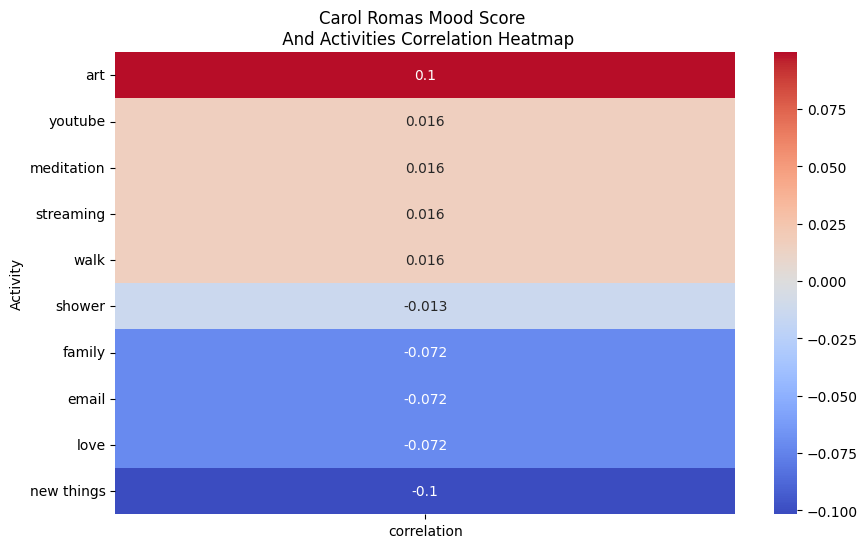

In [525]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    user_7_activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Carol Romas Mood Score \n And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('carol_romas_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [526]:
user_7_medium = user_7_sorted[(user_7_sorted['count'] >= 12) & (user_7_sorted['count'] <= 18)]

user_7_medium

,activities,count
11,shower,15


In [527]:
user_7_sorted.tail(9)

,activities,count
28,coding,2
29,language learning,2
30,write dairy,2
31,designing,1
32,art,1
33,love,1
34,email,1
35,family,1
36,kaballah,1


### Weekday Charts

In [528]:
df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful,1
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good,4
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad,2
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing,5
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal,3


In [529]:
df_bad_weekday = df[df['mood_encoded'] <= 2]
df_good_weekday = df[df['mood_encoded'] >= 3]

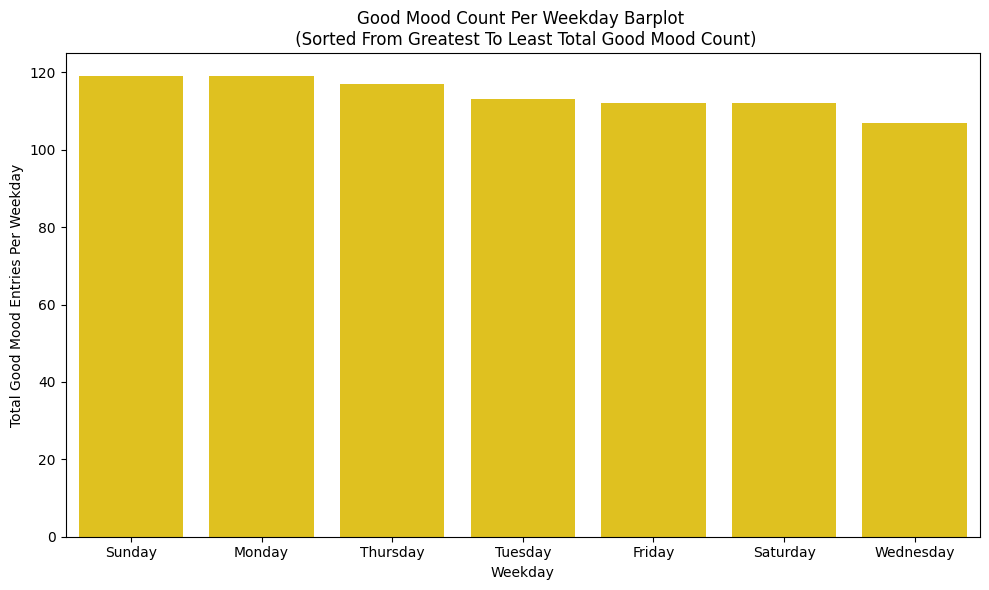

In [610]:
#Strech Goal: Mood trend by time of day or weekday using grouped line/bar charts
good_weekday_counts = df_good_weekday['weekday'].value_counts().reset_index()
good_weekday_counts.columns = ['weekday', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(data=good_weekday_counts, x='weekday', y='count', color='gold')
plt.title('Good Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Good Mood Count)')
plt.ylabel('Total Good Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('good_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

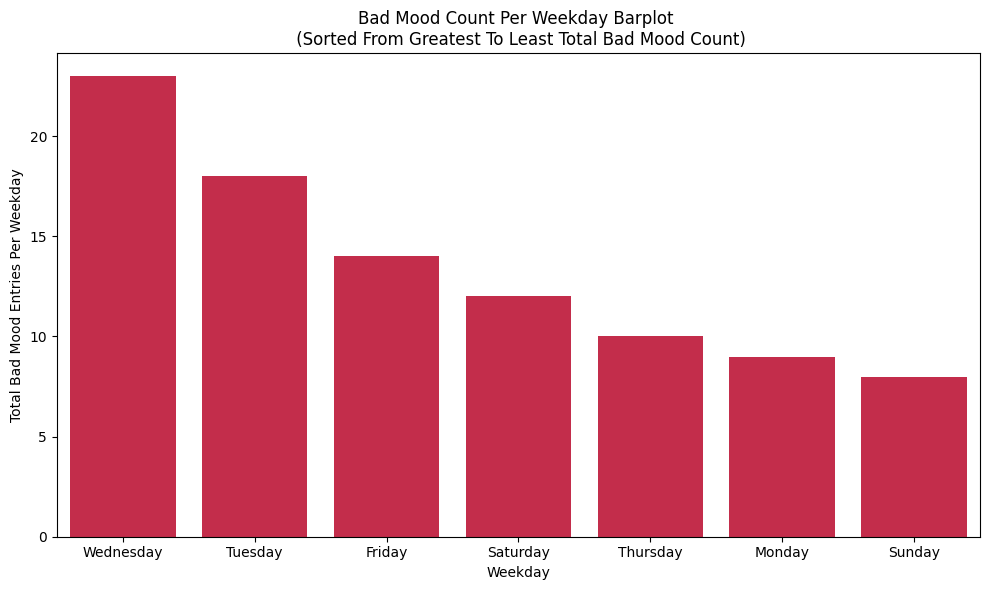

In [611]:
#Stretch Goal: Mood trend by time of day or weekday using grouped line/bar charts
bad_weekday_counts = df_bad_weekday['weekday'].value_counts().reset_index()
bad_weekday_counts.columns = ['weekday', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=bad_weekday_counts, x='weekday', y='count', color='crimson')
plt.title('Bad Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Bad Mood Count)')
plt.ylabel('Total Bad Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('bad_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [656]:
#Stretch Goal: Add basic anomaly or pattern detection (e.g., highlight unusual mood drops or consistent weekly patterns).
def mood_alert(df, mood_score_column, row_num):
  mood = df.iloc[row_num][mood_score_column]

  mood = pd.to_numeric(mood, errors='coerce')

  if pd.isna(mood):
    print("Mood value is missing or invalid")
  elif mood <= 2:
    print(f"I noticed you're having a rough day. Have you tried doing anything to improve your mood?")
  elif mood >= 3:
    print(f"I noticed you're in a good mood today. Keep up the good work!")
  else:
    print("Mood score out of expected range.")

In [657]:
mood_alert(user_df, 'mood_encoded', 4)

I noticed you're in a good mood today. Keep up the good work!


In [659]:
mood_alert(user_df, 'mood_encoded', 19)

I noticed you're having a rough day. Have you tried doing anything to improve your mood?


In [652]:
user_df.iloc[45]

,2018-01-11 23:49:00
weekday,Thursday
sub_mood,blessed
activities,youtube
mood,Good
mood_encoded,4
user_id,1


### Creating Features For Machine Learning

In [533]:
ml_df = activities_explode_df.copy()

ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [534]:
#ml_df.drop('mood', axis=1, inplace=True)

In [535]:
ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [536]:
weekday_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}

ml_df['weekday'] = ml_df['weekday'].map(weekday_map)

## Resampling Data

### The data looks messy so I decided not to do this time series task.

Here is the task I'm trying to solve:

Predict tomorrow’s mood rating based on the past 7 days.

In [537]:
ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,1,angry,reading,Awful,1
2021-12-04 21:52:00,1,angry,learning,Awful,1
2021-12-04 21:52:00,1,angry,fasting,Awful,1
2021-12-04 21:52:00,1,angry,walk,Awful,1
2021-12-04 21:52:00,1,angry,meditation,Awful,1


In [538]:
ml_df_resampled = ml_df.resample('W').agg({
    'mood_encoded' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'weekday' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'sub_mood' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'activities' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
})

In [539]:
ml_df_resampled.shape

(205, 4)

In [540]:
ml_df_resampled.isna().sum()

,0
mood_encoded,47
weekday,47
sub_mood,47
activities,47


In [541]:
ml_df_resampled.dropna(inplace=True)

In [542]:
ml_df_resampled.isna().sum()

,0
mood_encoded,0
weekday,0
sub_mood,0
activities,0


plt.figure(figsize=(10,4))
plt.plot(df_resampled.index, df_resampled['mood_encoded'])
plt.title("Daily Mood After Resampling")
plt.xlabel("Date")
plt.ylabel("Mood Score (Daily Mean)")
plt.show()


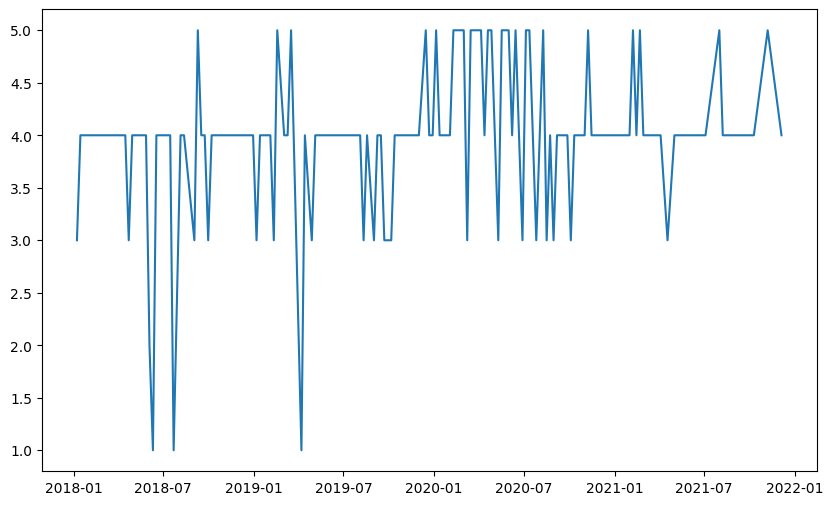

In [543]:
plt.figure(figsize=(10, 6))
plt.plot(ml_df_resampled.index, ml_df_resampled['mood_encoded'])

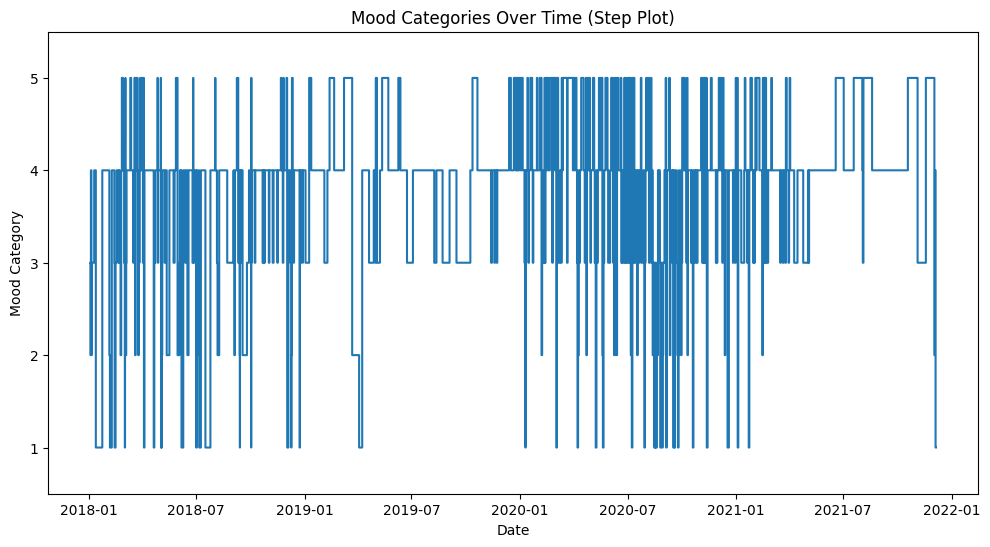

In [544]:
plt.figure(figsize=(12,6))
plt.step(ml_df.index, ml_df['mood_encoded'], where='mid')
plt.ylim(0.5, 5.5)
plt.yticks([1,2,3,4,5])
plt.title("Mood Categories Over Time (Step Plot)")
plt.xlabel("Date")
plt.ylabel("Mood Category")
plt.show()


### Stationary Test

In [545]:
stationary_test_check = adfuller(ml_df['mood_encoded'])
p_value = stationary_test_check[1]

#Print the p value of the stationary test.
print(f"Stationary Test P Value: {p_value:.2f}")

Stationary Test P Value: 0.00


Conclusion:

According to the stationary test's p-value, the dataset is stationary.

### Decomposing Dataset

### Classification Task

Here is the task I'm trying to solve:

“Predict most likely mood category given today’s logged activities.”

In [546]:
ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,1,angry,reading,Awful,1
2021-12-04 21:52:00,1,angry,learning,Awful,1
2021-12-04 21:52:00,1,angry,fasting,Awful,1
2021-12-04 21:52:00,1,angry,walk,Awful,1
2021-12-04 21:52:00,1,angry,meditation,Awful,1


In [547]:
ml_df = ml_df.drop(['sub_mood'], axis=1)

In [548]:
ml_df.head()

,weekday,activities,mood,mood_encoded
datetime,,,,
2021-12-04 21:52:00,1,reading,Awful,1
2021-12-04 21:52:00,1,learning,Awful,1
2021-12-04 21:52:00,1,fasting,Awful,1
2021-12-04 21:52:00,1,walk,Awful,1
2021-12-04 21:52:00,1,meditation,Awful,1


In [549]:
ml_df['activities'].nunique()

57

In [550]:
freq_map = ml_df['activities'].value_counts().to_dict()

ml_df['activities_freq'] = ml_df['activities'].map(freq_map)

In [551]:
ml_df.columns

Index(['weekday', 'activities', 'mood', 'mood_encoded', 'activities_freq'], dtype='object')

In [552]:
df['mood'].unique()

array(['Awful', 'Good', 'Bad', 'Amazing', 'Normal'], dtype=object)

In [553]:
ml_df = ml_df.drop('mood_encoded', axis=1)
mood_binary_map = {
    'Awful': 0,
    'Bad' : 0,
    'Good': 1,
    'Normal' : 1,
    'Amazing': 1
}

ml_df['mood'] = ml_df['mood'].map(mood_binary_map)

In [554]:
ml_df.isna().sum()

,0
weekday,0
activities,0
mood,0
activities_freq,0


In [555]:
ml_df.head()

,weekday,activities,mood,activities_freq
datetime,,,,
2021-12-04 21:52:00,1,reading,0,273
2021-12-04 21:52:00,1,learning,0,241
2021-12-04 21:52:00,1,fasting,0,485
2021-12-04 21:52:00,1,walk,0,521
2021-12-04 21:52:00,1,meditation,0,541


mood_counts = df['mood'].value_counts().sort_index()
mood_percent = df['mood'].value_counts(normalize=True).sort_index() * 100
import matplotlib.pyplot as plt

mood_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Class Distribution of Mood")
plt.xlabel("Mood Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


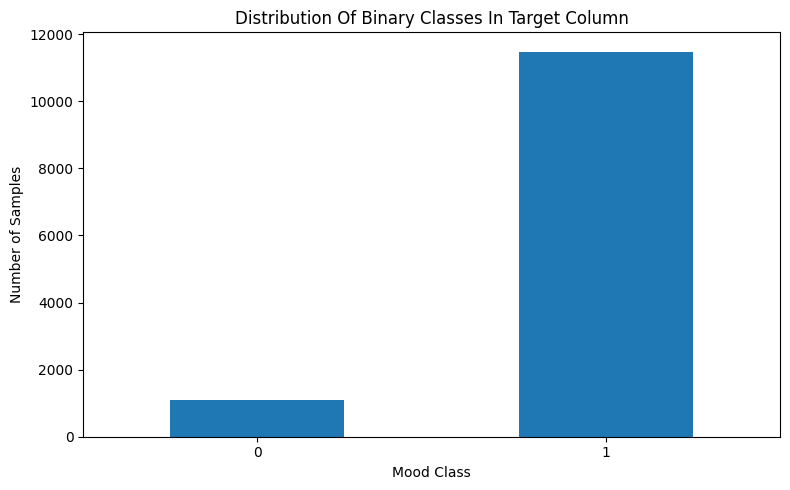

In [621]:
mood_counts = ml_df['mood'].value_counts().sort_index()
mood_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Distribution Of Binary Classes In Target Column")
plt.xlabel("Mood Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [619]:
zero_counts = (ml_df['mood'] == 0).sum()

print(f"'0' (Bad Mood) Class Counts: {zero_counts}")

'0' (Bad Mood) Class Counts: 1089


In [618]:
one_counts = (ml_df['mood'] == 1).sum()

print(f"'1' (Good mood) Class Counts: {one_counts}")

'1' (Good mood) Class Counts: 11478


### Threshold Adjustment Function

In [557]:
#Create function to adjust the threshold.
def custom_predict(model, X, threshold):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return y_pred

In [558]:
thresholds = np.arange(0.25, 0.55, 0.02)

### Splitting The Data

In [559]:
ml_df.columns

Index(['weekday', 'activities', 'mood', 'activities_freq'], dtype='object')

In [560]:
y = ml_df['mood']

X = ml_df[['activities_freq', 'weekday']]

In [561]:
state = np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

In [562]:
X_train.isna().sum()

,0
activities_freq,0
weekday,0


In [563]:
X_test.isna().sum()

,0
activities_freq,0
weekday,0


In [564]:
y_train.isna().sum()

np.int64(0)

In [565]:
y_test.isna().sum()

np.int64(0)

### Feature Upsampling

In [566]:
def upsample(features, target):
  features_zeros = features[target ==0]
  features_ones = features[target == 1]
  target_zeros = target[target == 0]
  target_ones = target[target == 1]

  n_zeros = len(target_zeros)
  n_ones = len(target_ones)

  repeat = n_ones // n_zeros

  features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
  target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])

  features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=state)

  return features_upsampled, target_upsampled

In [567]:
X_upsampled, y_upsampled = upsample(X, y)

In [568]:
X_train_upsampled, X_vt_upsampled, y_train_upsampled, y_vt_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.4, random_state=state)

In [569]:
X_valid_upsampled, X_test_upsampled, y_valid_upsampled, y_test_upsampled = train_test_split(X_vt_upsampled, y_vt_upsampled, test_size=0.5, random_state=state)

In [570]:
X_train.isna().sum()

,0
activities_freq,0
weekday,0


In [571]:
X_test.isna().sum()

,0
activities_freq,0
weekday,0


In [572]:
y_train.isna().sum()

np.int64(0)

In [573]:
y_test.isna().sum()

np.int64(0)

### Prediction Results Function

In [574]:
def prediction_results(model, X, y, dataset_name="Dataset", average='macro'):
    y_pred = model.predict(X)

    f1 = f1_score(y, y_pred, average=average)

    print(f"\n{dataset_name} Results")
    print("-" * 30)
    print(f"F1 Score ({average}): {f1:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    return f1


### Logisitc Regression Model

In [575]:
lr = LogisticRegression()

lr.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression()

In [576]:
lr_train_pred_f1 = prediction_results(lr, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.4124

Confusion Matrix:
[[ 251 1971]
 [ 260 1992]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.11      0.18      2222
           1       0.50      0.88      0.64      2252

    accuracy                           0.50      4474
   macro avg       0.50      0.50      0.41      4474
weighted avg       0.50      0.50      0.41      4474



### Random Forest Classifier

In [577]:
rf = RandomForestClassifier(random_state=state)

rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "max_features": ["sqrt", 0.5]
}

In [578]:
rf_gsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 400]},
             scoring='f1_macro', verbose=1)

In [579]:
print(f"Random Forest Classifier Model Best Hyperparameters: {rf_gsearch.best_params_}")
print(f"Random Forest Classifier Model Best F1 Score: {rf_gsearch.best_score_:.2f}")

Random Forest Classifier Model Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Random Forest Classifier Model Best F1 Score: 0.60


In [580]:
rf = RandomForestClassifier(
    max_depth=10,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=400
)

rf.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(max_depth=10, max_features=0.5, n_estimators=400)

In [581]:
rf_valid_pred_f1 = prediction_results(rf, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')



Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.6003

Confusion Matrix:
[[1235  987]
 [ 797 1455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      2222
           1       0.60      0.65      0.62      2252

    accuracy                           0.60      4474
   macro avg       0.60      0.60      0.60      4474
weighted avg       0.60      0.60      0.60      4474



In [582]:
for t in thresholds:
    rf_us_valid_pred = custom_predict(rf, X_valid_upsampled, t)
    f1 = f1_score(y_valid_upsampled, rf_us_valid_pred, average="macro")
    print(f"threshold={t:.2f}, macro_f1={f1:.3f}")

threshold=0.25, macro_f1=0.363
threshold=0.27, macro_f1=0.385
threshold=0.29, macro_f1=0.410
threshold=0.31, macro_f1=0.433
threshold=0.33, macro_f1=0.442
threshold=0.35, macro_f1=0.468
threshold=0.37, macro_f1=0.486
threshold=0.39, macro_f1=0.504
threshold=0.41, macro_f1=0.537
threshold=0.43, macro_f1=0.555
threshold=0.45, macro_f1=0.576
threshold=0.47, macro_f1=0.597
threshold=0.49, macro_f1=0.600
threshold=0.51, macro_f1=0.600
threshold=0.53, macro_f1=0.598
threshold=0.55, macro_f1=0.584


In [583]:
rf_valid_predict_tr = custom_predict(rf, X_valid_upsampled, 0.53)

In [584]:
rf_tr_valid_f1 = f1_score(y_valid_upsampled, rf_valid_predict_tr, average='macro')
print(f"Random Forest Classifier (Upsampled + Threshold Adjustment) Validation F1 Score: {rf_tr_valid_f1:.2f}")

Random Forest Classifier (Upsampled + Threshold Adjustment) Validation F1 Score: 0.60


In [585]:
rf_tr_valid_cm = confusion_matrix(y_valid_upsampled, rf_valid_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Validation Confusion Matrix:")
print(rf_tr_valid_cm)

Random Forest Classifier (Upsampled + Threshold Adjustment) Validation Confusion Matrix:
[[1435  787]
 [1007 1245]]


In [586]:
rf_tr_valid_cr = classification_report(y_valid_upsampled, rf_valid_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Train Classification Report:")
print(rf_tr_valid_cr)

Random Forest Classifier (Upsampled + Threshold Adjustment) Train Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2222
           1       0.61      0.55      0.58      2252

    accuracy                           0.60      4474
   macro avg       0.60      0.60      0.60      4474
weighted avg       0.60      0.60      0.60      4474



### Gradient Boost Classifier Model

In [587]:
gbc = GradientBoostingClassifier(random_state=state)

In [588]:
gbc_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "subsample": [0.8, 1.0],
    "max_features": [None, "sqrt"],
}

In [589]:
gbc_gsearch = GridSearchCV(
    estimator=gbc,
    param_grid=gbc_param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
    )

gbc_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [590]:
print(f"Gradient Boost Classifier Model Best Hyperparameters: {gbc_gsearch.best_params_}")
print(f"Gradient Boost Classifier Model Best F1 Score: {gbc_gsearch.best_score_:.2f}")

Gradient Boost Classifier Model Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boost Classifier Model Best F1 Score: 0.48


In [591]:
gbc = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=2,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    subsample=0.8)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, subsample=0.8)

In [592]:
gbc_valid_pred_f1 = prediction_results(gbc, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.3348

Confusion Matrix:
[[   0 2222]
 [   0 2252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2222
           1       0.50      1.00      0.67      2252

    accuracy                           0.50      4474
   macro avg       0.25      0.50      0.33      4474
weighted avg       0.25      0.50      0.34      4474



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### XG Boost Classifier Model

In [593]:
xgbc = XGBClassifier(random_state=state)

In [594]:
xgbc_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [2, 3],
    "learning_rate": [0.05, 0.1],
    "min_child_weight": [1, 5],
    "subsample": [0.8, 1.0],
    "gamma": [0, 0.3],
    "reg_lambda": [1.0, 5.0],
    "scale_pos_weight": [1, 5]
}

In [595]:
xgbc_gsearch = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

xgbc_gsearch.fit(X_train_upsampled, y_train_upsampled)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.3], 'learning_rate': [0.05, 0.1],
                         'max_depth': [2, 3], 'min_child_weight': [1, 5],
                         'n_estimators': [200, 400], 'reg_lambda': [1.0, 5.0],
                         'scale_pos_weight': [1, 5], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [596]:
print(f"XgBoost Classifier Model Best Hyperparameters: {xgbc_gsearch.best_params_}")
print(f"XGBoost Classifier Model Best Score: {xgbc_gsearch.best_score_:.2f}")

XgBoost Classifier Model Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400, 'reg_lambda': 1.0, 'scale_pos_weight': 1, 'subsample': 0.8}
XGBoost Classifier Model Best Score: 0.60


In [597]:
xgbc = XGBClassifier(
    gamma=0,
    learning_rate=0.1,
    max_depth=2,
    min_child_weight=1,
    n_estimators=200,
    reg_lambda=1.0,
    scale_pos_weight=1,
    subsample=0.8
)

xgbc.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [598]:
xgbc_valid_pred_f1 = prediction_results(xgbc, X_valid_upsampled, y_valid_upsampled, dataset_name="Upsampled Validation Set", average='macro')


Upsampled Validation Set Results
------------------------------
F1 Score (macro): 0.5949

Confusion Matrix:
[[1200 1022]
 [ 784 1468]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      2222
           1       0.59      0.65      0.62      2252

    accuracy                           0.60      4474
   macro avg       0.60      0.60      0.59      4474
weighted avg       0.60      0.60      0.60      4474



### Choosing The Best Model (Random Forest Classifier)

In [599]:
rf_test_pred_f1 = prediction_results(rf, X_test_upsampled, y_test_upsampled, dataset_name="Upsampled Test Set", average='macro')


Upsampled Test Set Results
------------------------------
F1 Score (macro): 0.5972

Confusion Matrix:
[[1209  989]
 [ 807 1469]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57      2198
           1       0.60      0.65      0.62      2276

    accuracy                           0.60      4474
   macro avg       0.60      0.60      0.60      4474
weighted avg       0.60      0.60      0.60      4474



In [600]:
for t in thresholds:
    rf_us_test_pred = custom_predict(rf, X_test_upsampled, t)
    f1 = f1_score(y_test_upsampled, rf_us_test_pred, average="macro")
    print(f"threshold={t:.2f}, macro_f1={f1:.3f}")

threshold=0.25, macro_f1=0.381
threshold=0.27, macro_f1=0.398
threshold=0.29, macro_f1=0.419
threshold=0.31, macro_f1=0.434
threshold=0.33, macro_f1=0.446
threshold=0.35, macro_f1=0.466
threshold=0.37, macro_f1=0.481
threshold=0.39, macro_f1=0.495
threshold=0.41, macro_f1=0.527
threshold=0.43, macro_f1=0.543
threshold=0.45, macro_f1=0.561
threshold=0.47, macro_f1=0.586
threshold=0.49, macro_f1=0.593
threshold=0.51, macro_f1=0.605
threshold=0.53, macro_f1=0.601
threshold=0.55, macro_f1=0.586


In [601]:
rf_test_predict_tr = custom_predict(rf, X_test_upsampled, 0.53)

In [602]:
rf_tr_test_f1 = f1_score(y_test_upsampled, rf_test_predict_tr, average='macro')
print(f"Random Forest Classifier (Upsampled + Threshold Adjustment) Test F1 Score: {rf_tr_valid_f1:.2f}")

Random Forest Classifier (Upsampled + Threshold Adjustment) Test F1 Score: 0.60


In [603]:
rf_tr_test_cm = confusion_matrix(y_test_upsampled, rf_test_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Test Confusion Matrix:")
print(rf_tr_test_cm)

Random Forest Classifier (Upsampled + Threshold Adjustment) Test Confusion Matrix:
[[1450  748]
 [1032 1244]]


In [604]:
rf_tr_test_cr = classification_report(y_test_upsampled, rf_test_predict_tr)
print("Random Forest Classifier (Upsampled + Threshold Adjustment) Test Set Classification Report:")
print(rf_tr_valid_cr)

Random Forest Classifier (Upsampled + Threshold Adjustment) Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2222
           1       0.61      0.55      0.58      2252

    accuracy                           0.60      4474
   macro avg       0.60      0.60      0.60      4474
weighted avg       0.60      0.60      0.60      4474



In [605]:
def model_roc_auc(model, X_test, y_test):
    model_y_pred_proba = model.predict_proba(X_test)
    model_y_pred_proba = model_y_pred_proba[:, 1]
    model_roc_auc = roc_auc_score(y_test, model_y_pred_proba)

    return model_roc_auc

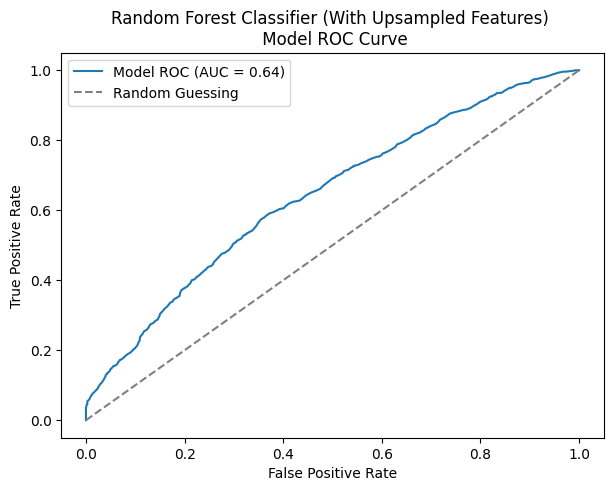

In [606]:
#Use the previously created model_roc_auc() function to calculate ROC-AUC score for
#the Random Forest CLassifier model.
rf_auc = model_roc_auc(rf, X_test_upsampled, y_test_upsampled)
#Use the predict_proba() method in order to make a prediction of the test set.
rf_y_pred_proba = rf.predict_proba(X_test_upsampled)[:, 1]

#Use the roc_curve() method in order to get the fpr (False Positive Rate),
#tpr(True Positive Rate), and the thresholds for the model.  The variables
#will be used to plot the roc_curve.
fpr, tpr, thresholds = roc_curve(y_test_upsampled, rf_y_pred_proba)

#Use matplotlib in order to plot the ROC Curve.
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Model ROC (AUC = {rf_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier (With Upsampled Features) \n Model ROC Curve')
plt.legend()
plt.savefig('rf_classifier_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

ML Slide Text:

* This model predicts whether a user will have an overall good mood or bad mood based on the available dataset features: activitiy frequency and weekday.

* Random Forest Classifier Model F1 Score: 0.60

* Random Forest Classifier Model Precision Score: 0.60

* Random Forest Classifier Model Recall Score: 0.65